In [157]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [158]:
heart_df = pd.read_csv('E:/College related/Projects/heart.csv');
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [190]:
categorical_data = heart_df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'age_group']]
numeric_data = heart_df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak' ,'HeartDisease']]

### Data Cleaning

In [191]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [192]:
heart_df.describe(include = object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,age_group
count,918,918,918,918,918,918
unique,2,4,3,2,3,2
top,M,ASY,Normal,N,Flat,adult
freq,725,496,552,547,460,665


In [193]:
heart_df.duplicated().sum()

0

In [194]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
age_group         0
dtype: int64

In [195]:
heart_df['age_group'] = ['teen' if i < 18 else 'adult' if i < 60 else 'old' for i in heart_df.Age]
heart_df['age_group'].unique()

array(['adult', 'old'], dtype=object)

### Exploration of Numerical Data

In [196]:
heart_df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

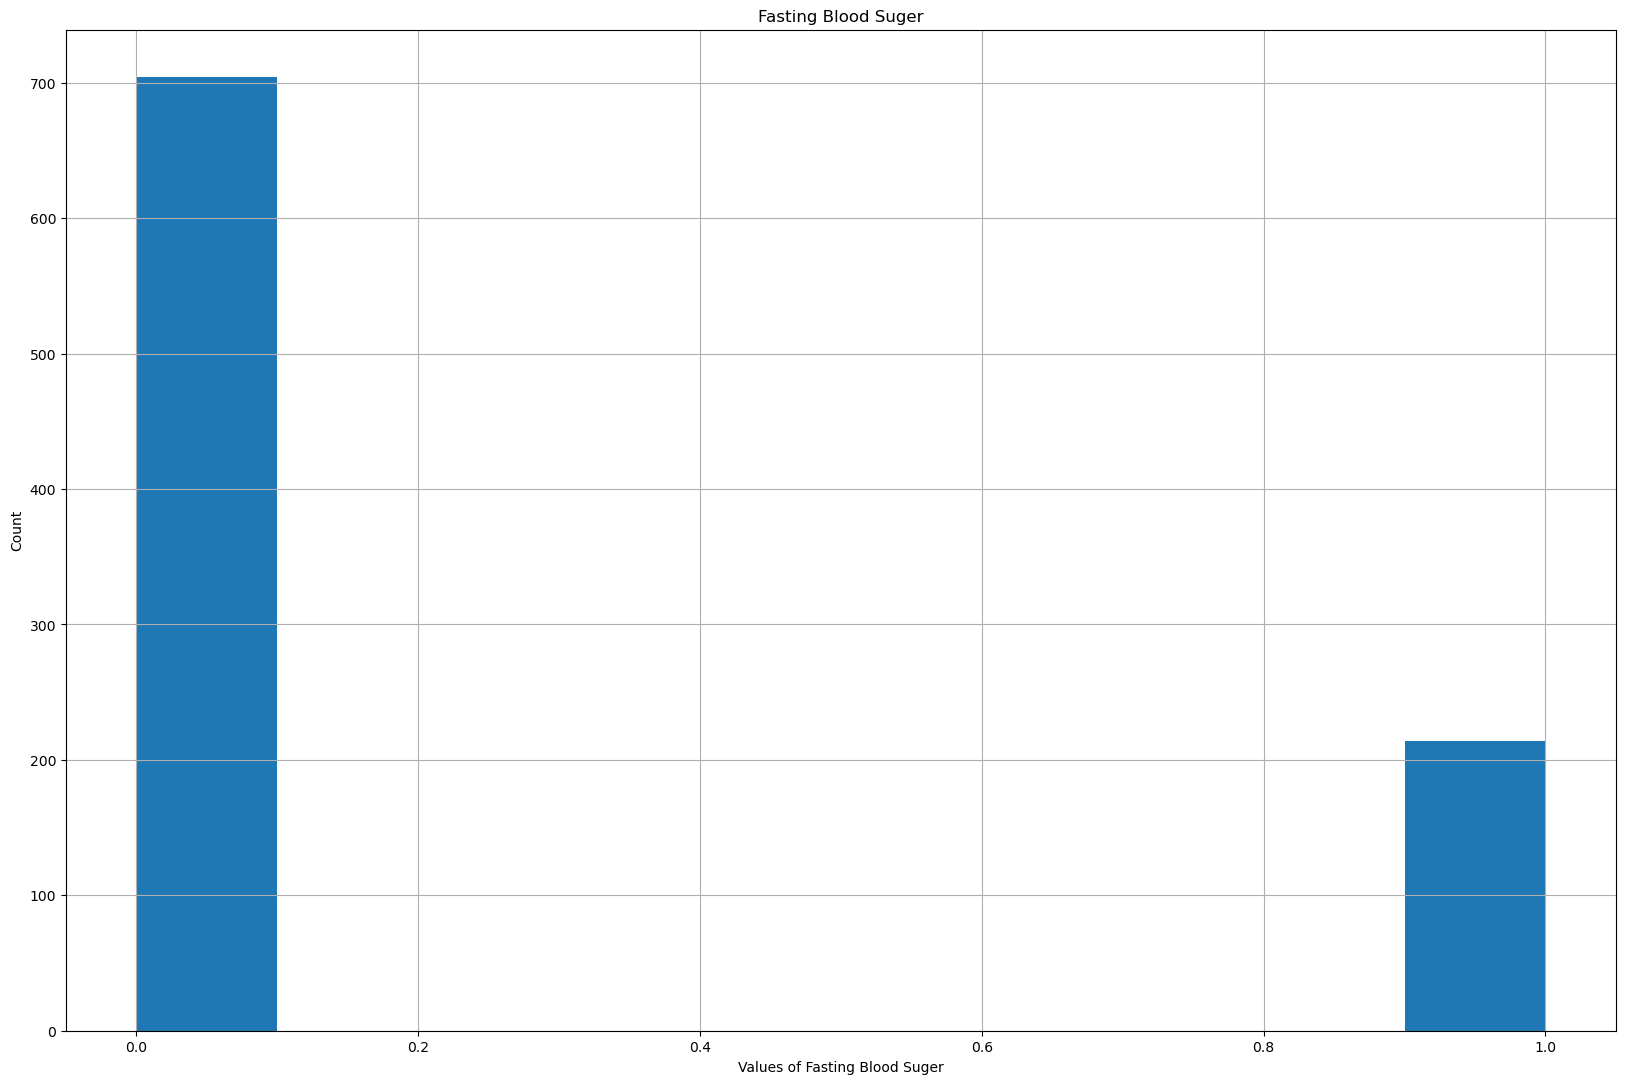

In [197]:
heart_df.FastingBS.hist()
plt.xlabel('Values of Fasting Blood Suger')
plt.ylabel('Count')
plt.title('Fasting Blood Suger')
plt.show()

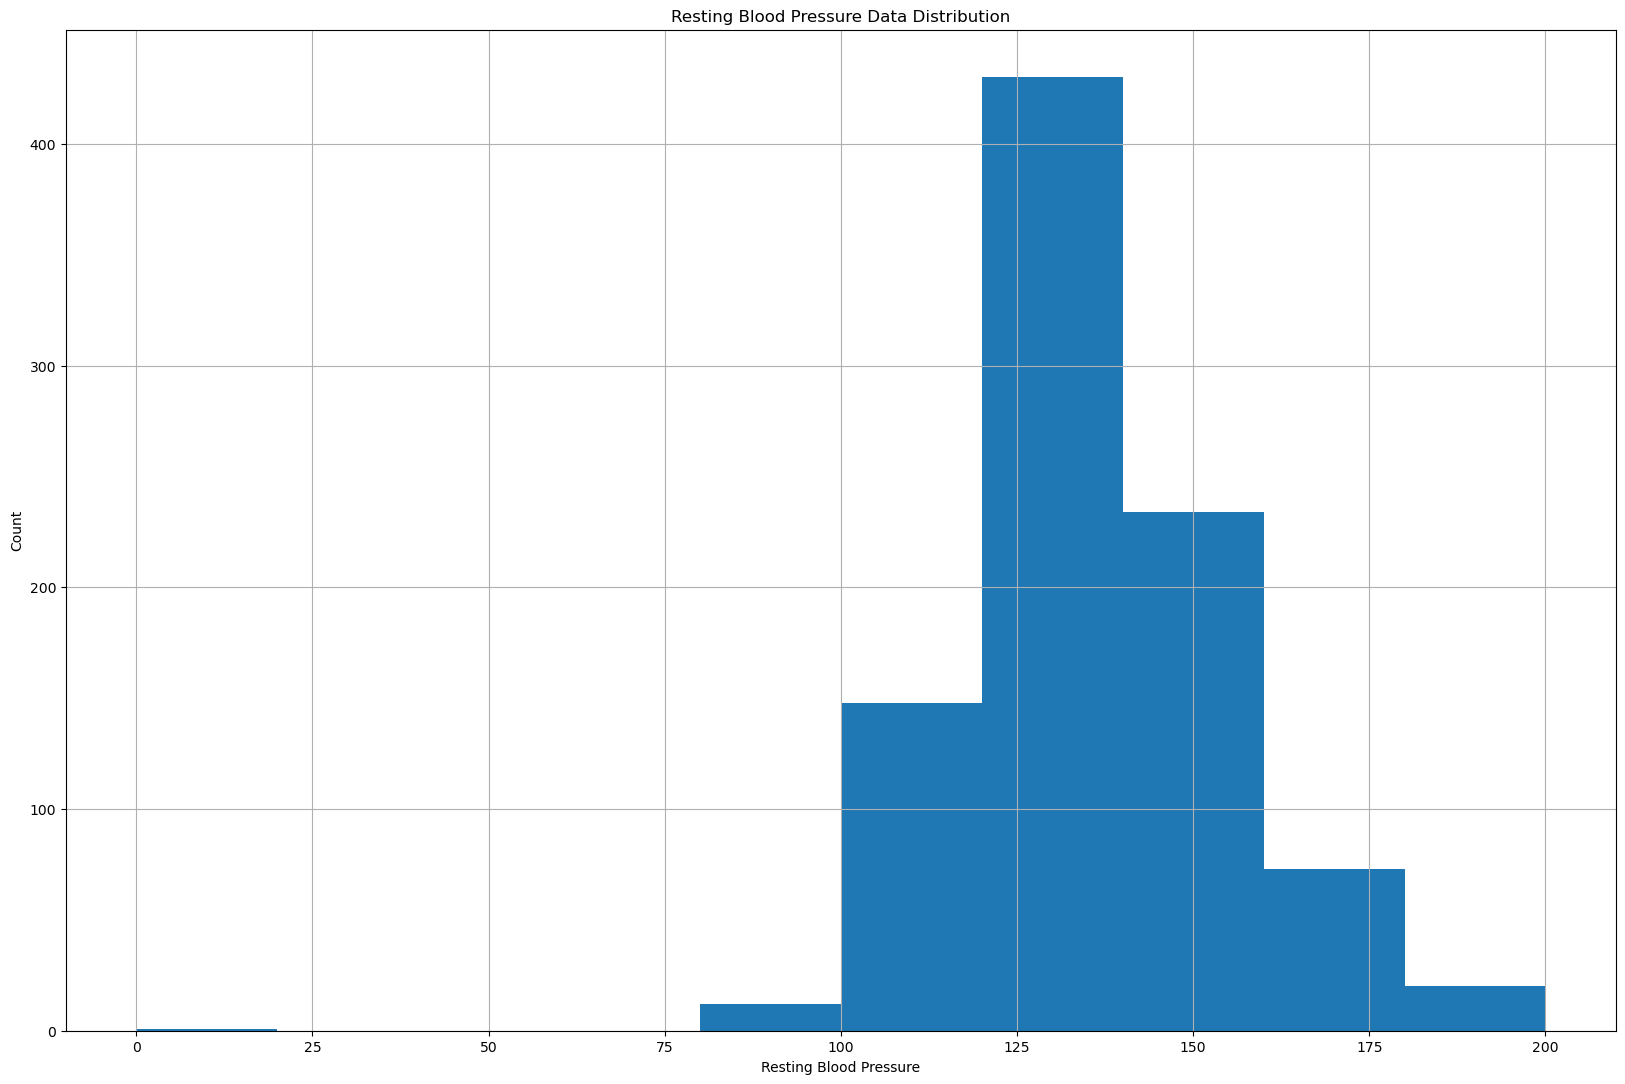

In [198]:
heart_df.RestingBP.hist()
plt.xlabel('Resting Blood Pressure');
plt.ylabel('Count');
plt.title('Resting Blood Pressure Data Distribution');
plt.show()

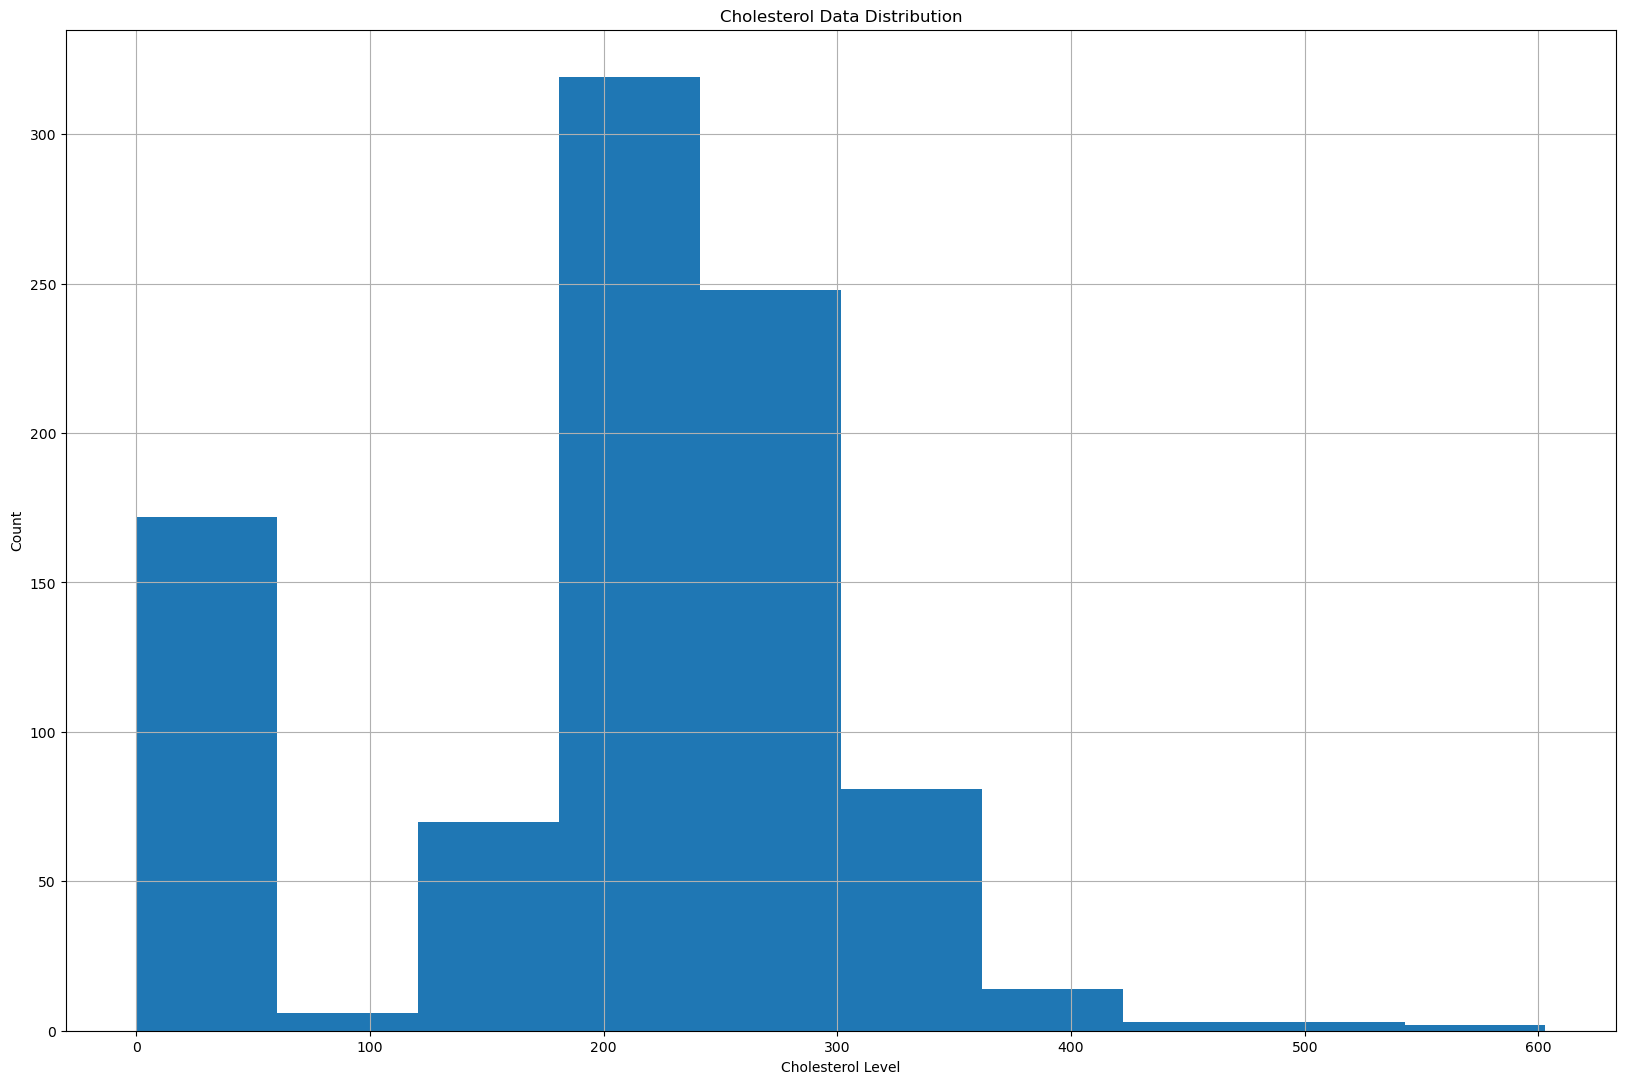

In [199]:
heart_df.Cholesterol.hist()
plt.xlabel('Cholesterol Level');
plt.ylabel('Count');
plt.title('Cholesterol Data Distribution');
plt.show()

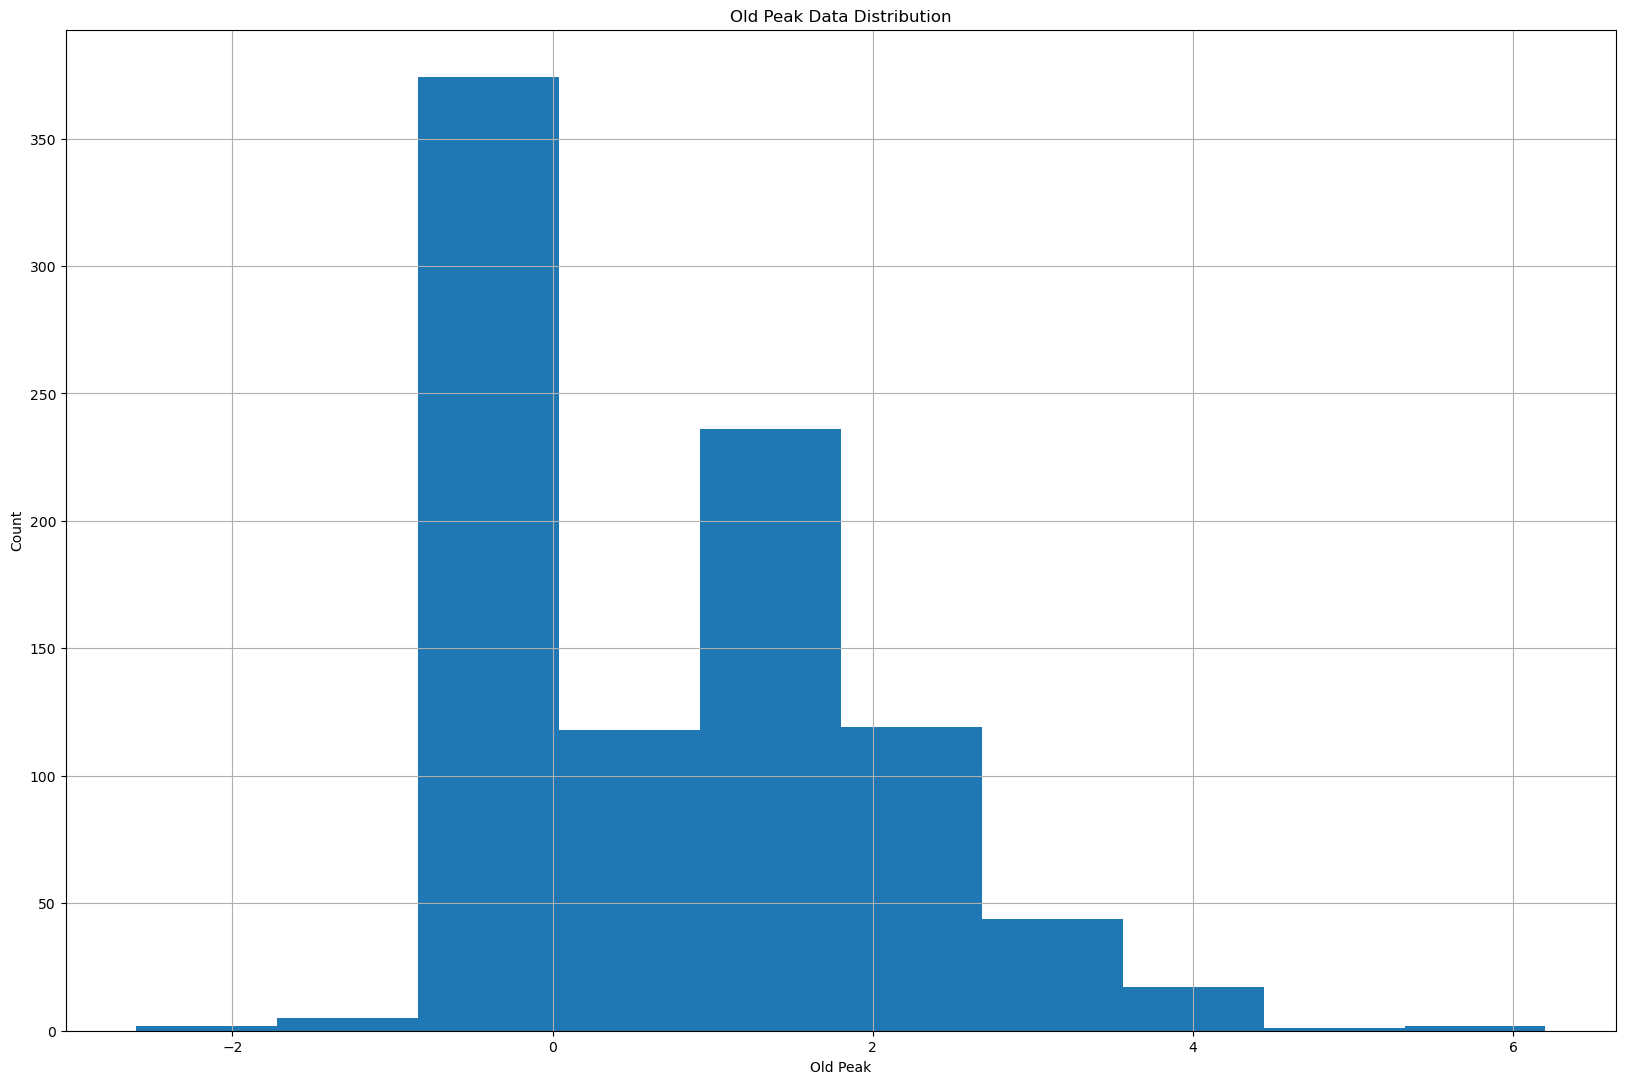

In [200]:
heart_df.Oldpeak.hist()
plt.xlabel('Old Peak');
plt.ylabel('Count');
plt.title('Old Peak Data Distribution');
plt.show()

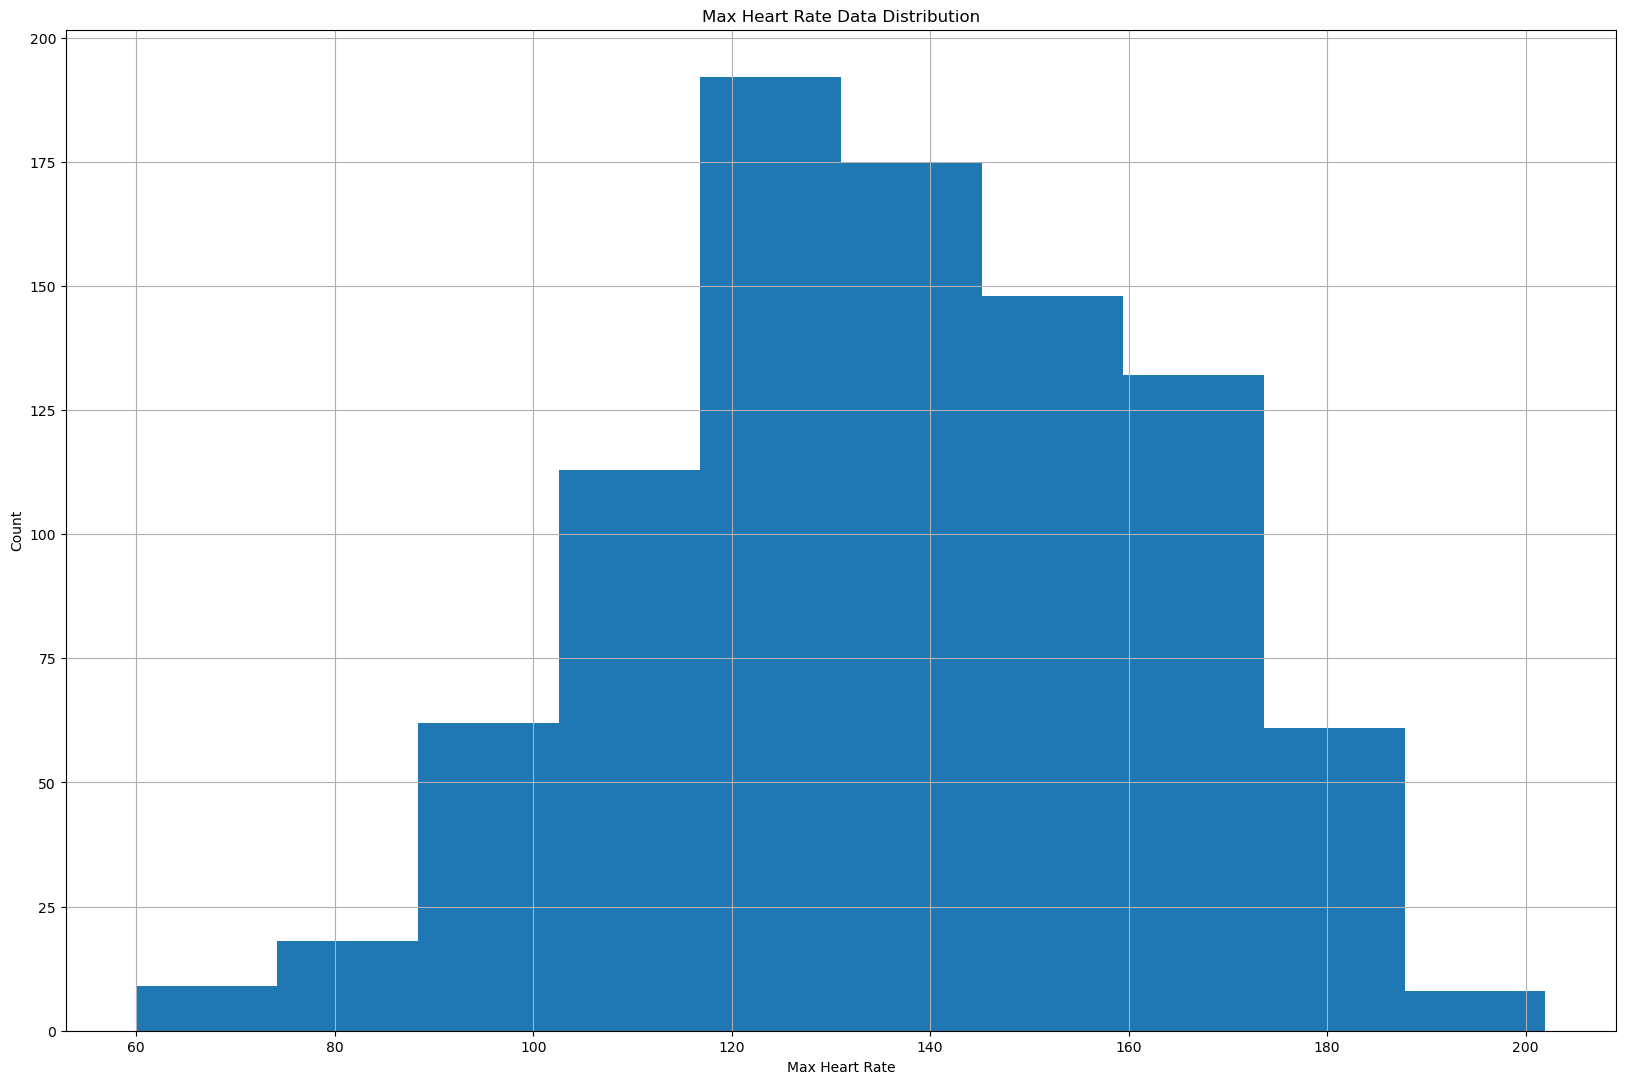

In [201]:
heart_df.MaxHR.hist()
plt.xlabel('Max Heart Rate');
plt.ylabel('Count');
plt.title('Max Heart Rate Data Distribution');
plt.show()

In [202]:
adult = heart_df[heart_df['age_group'] == 'adult']

In [203]:
old = heart_df[heart_df['age_group'] == 'old']

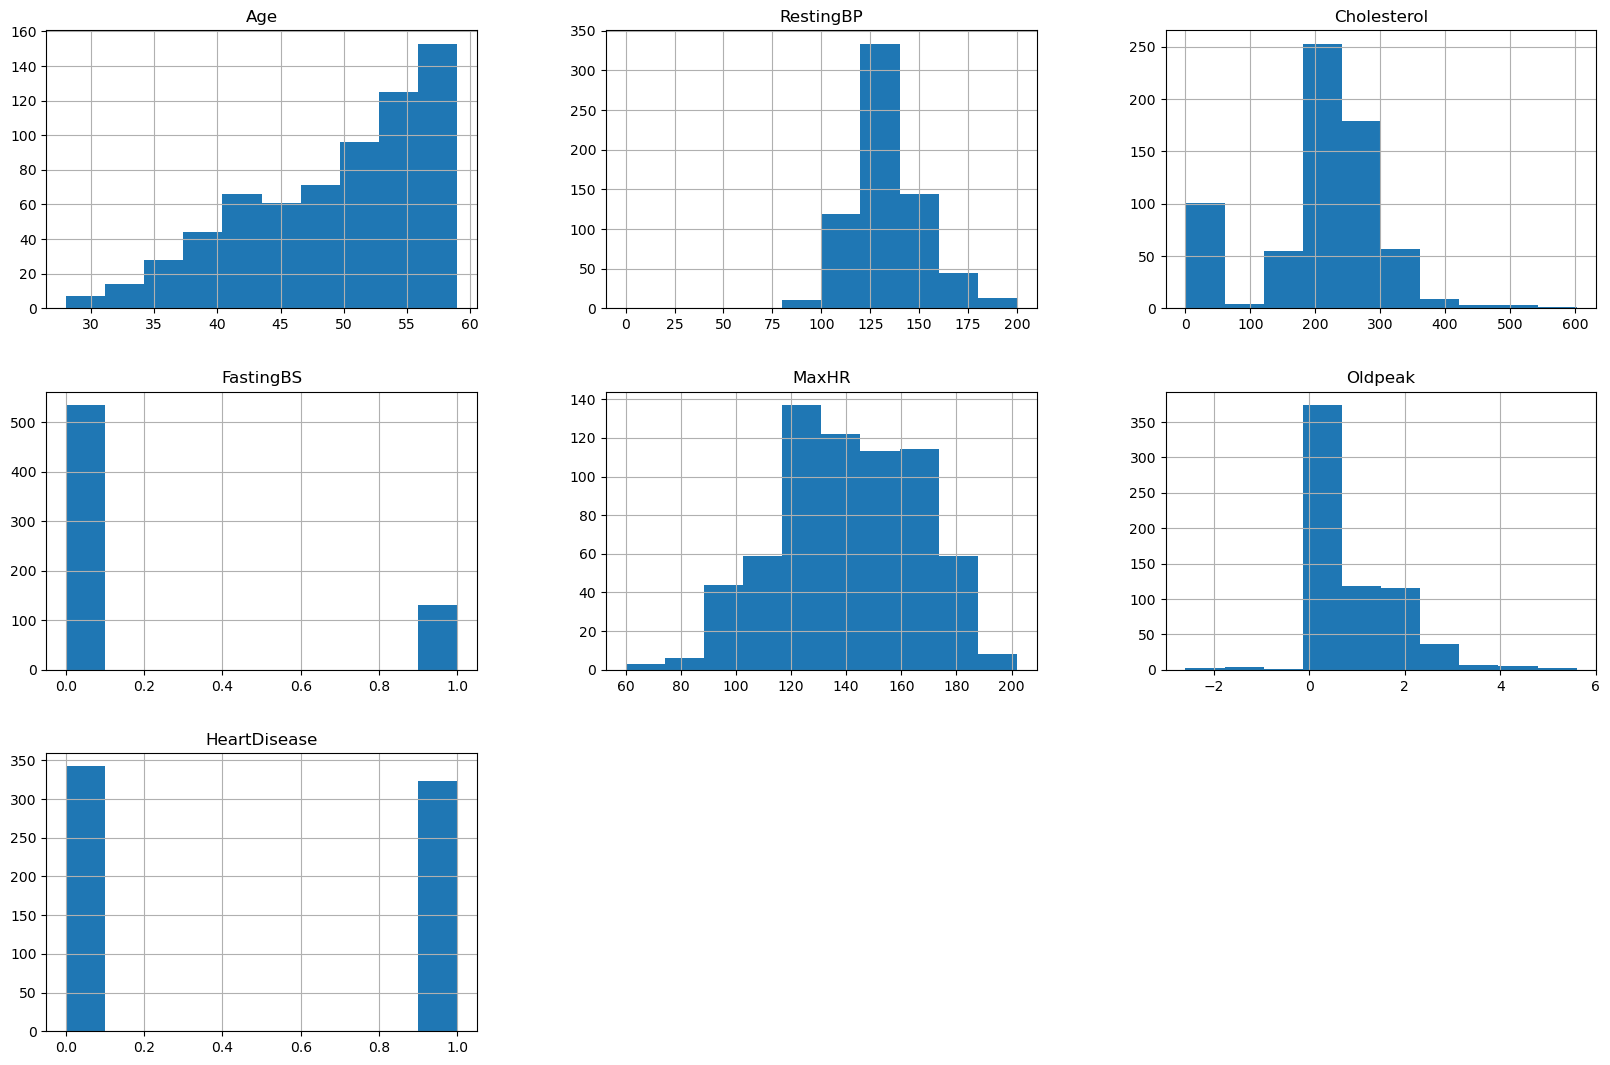

In [204]:
plt.rcParams["figure.figsize"] = (20,13) 
### Is age related to high blood pressure
adult.hist()
plt.show()

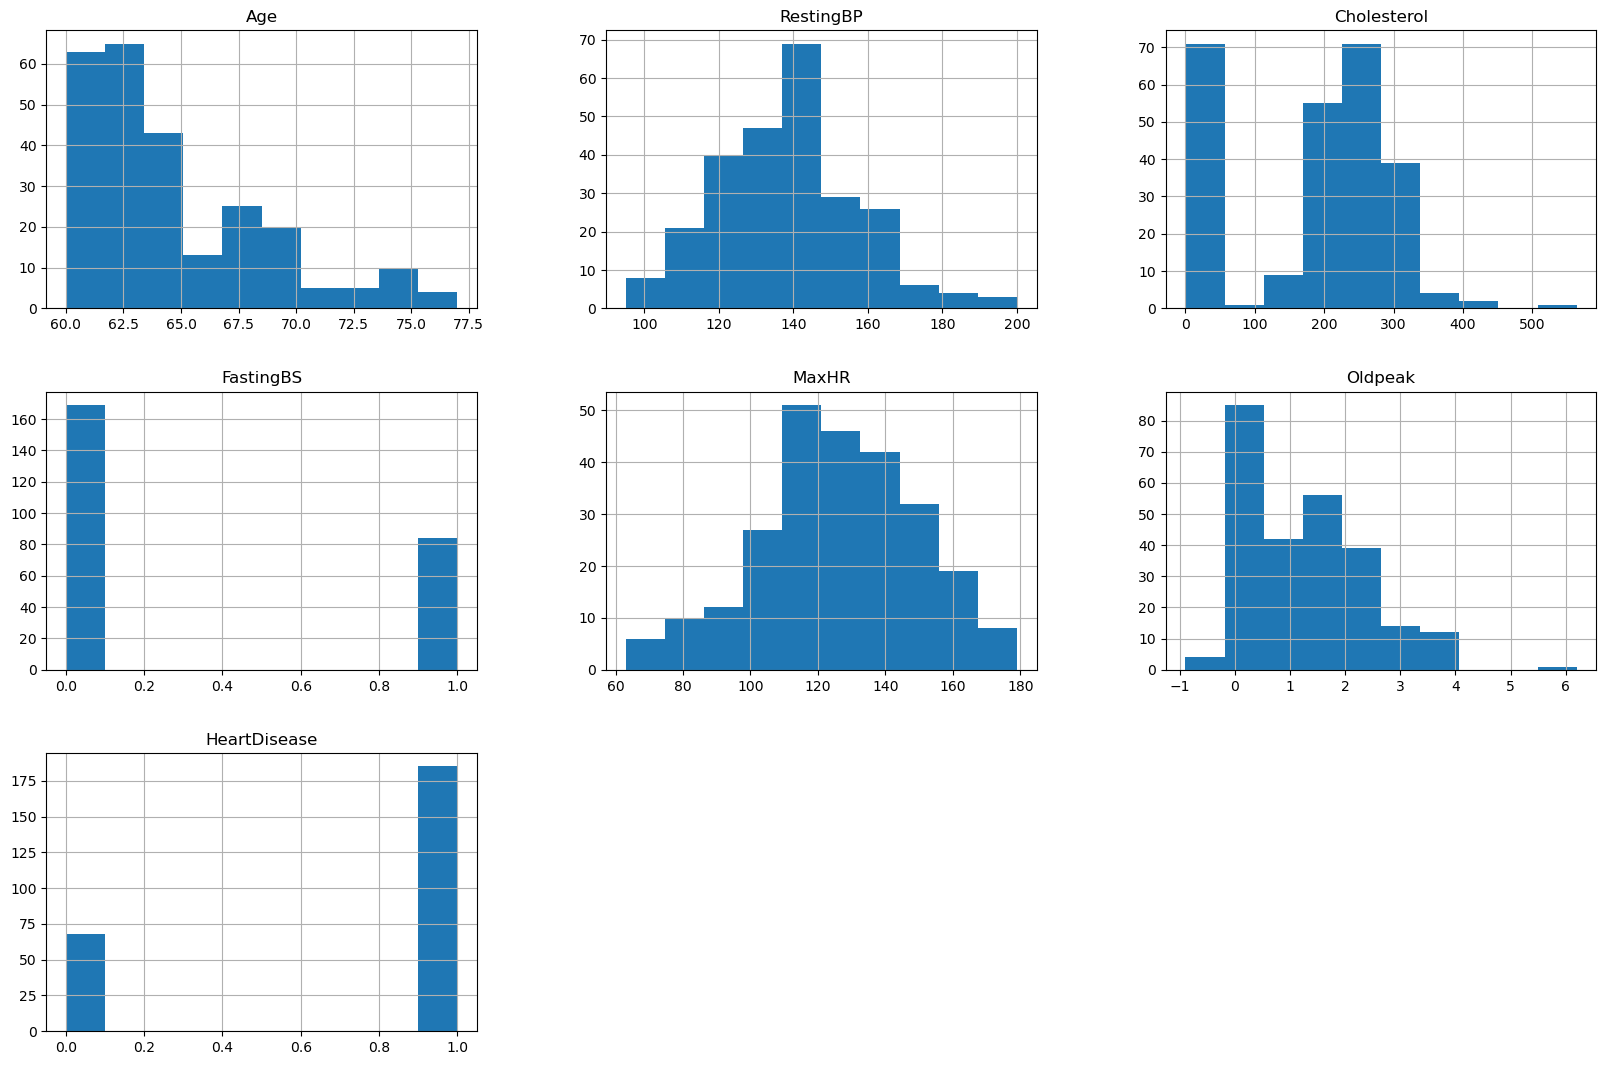

In [205]:
plt.rcParams["figure.figsize"] = (20,13) 
### Is age related to high blood pressure
old.hist()
plt.show()

### this shows that the age has a slight effect on the heart in general, but its not the main reason why people get heart diseases

In [206]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  age_group       918 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 93.4+ KB


In [207]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'age_group'],
      dtype='object')

In [208]:
categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)
categorical_data_encoded.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,age_group_old
0,1,1,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0
2,1,1,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,1,1,0,0
4,1,0,1,0,1,0,0,0,1,0


In [209]:
df_new = pd.concat([numeric_data, categorical_data_encoded], axis=1)
df_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,age_group_old
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1,0


In [210]:
X = df_new[['Age', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
            'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG_Normal', 'RestingECG_ST', 'MaxHR',
            'ExerciseAngina_Y', 'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up', 'age_group_old']].values
y = df_new['HeartDisease'].values

In [211]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:] 
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


[[ 1. 40.  1. ...  0.  1.  0.]
 [ 0. 49.  0. ...  1.  0.  0.]
 [ 1. 37.  1. ...  0.  1.  0.]
 ...
 [ 1. 57.  0. ...  1.  0.  0.]
 [ 0. 57.  1. ...  1.  0.  0.]
 [ 1. 38.  0. ...  0.  1.  0.]]


In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [215]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 16))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [216]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 734 samples
Epoch 1/100
734/734 [==============================] - 4s 6ms/sample - loss: 0.6339 - accuracy: 0.5463
Epoch 2/100
734/734 [==============================] - 0s 125us/sample - loss: 0.5867 - accuracy: 0.6948
Epoch 3/100
734/734 [==============================] - 0s 107us/sample - loss: 0.5474 - accuracy: 0.7670
Epoch 4/100
734/734 [==============================] - 0s 101us/sample - loss: 0.5111 - accuracy: 0.8147
Epoch 5/100
734/734 [==============================] - 0s 111us/sample - loss: 0.4788 - accuracy: 0.8311
Epoch 6/100
734/734 [==============================] - 0s 127us/sample - loss: 0.4491 - accuracy: 0.8433
Epoch 7/100
734/734 [==============================] - 0s 110us/sample - loss: 0.4230 - accuracy: 0.8474
Epoch 8/100
734/734 [==============================] - 0s 105us/sample - loss: 0.3999 - accuracy: 0.8515
Epoch 9/100
734/734 [==============================] - 0s 122us/sample - loss: 0.3810 - accuracy: 0.8515
Epoch 10/100
734/734 [==============

In [219]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58 19]
 [10 97]]


0.842391304347826